In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("salary_data.csv")
df.head()

,age,years_experience,salary,salary_range
0,32.0,5.0,90000.0,low
1,28.0,3.0,65000.0,low
2,45.0,15.0,150000.0,high
3,36.0,7.0,60000.0,low
4,52.0,20.0,200000.0,high


In [30]:
df.drop(columns=['salary'], inplace=True)
df.head()

,age,years_experience,salary_range
0,32.0,5.0,low
1,28.0,3.0,low
2,45.0,15.0,high
3,36.0,7.0,low
4,52.0,20.0,high


In [31]:
# pd.get_dummies(df['salary_range'], drop_first=True)
# df.head()
df['salary_range'] = pd.factorize(df['salary_range'])[0]
# print(df.shape, len(pd.factorize(df['salary_range'])))

In [32]:
df.head()

,age,years_experience,salary_range
0,32.0,5.0,0
1,28.0,3.0,0
2,45.0,15.0,1
3,36.0,7.0,0
4,52.0,20.0,1


In [33]:
X = df[['age', 'years_experience']]
y = df['salary_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

298
75
298
75


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8533333333333334

In [35]:
y_pred = model.predict(X_test)

check_df = pd.DataFrame({'real': y_test, 'predicted': y_pred})
check_df.head(20)

,real,predicted
150,0,0
354,1,1
54,0,0
102,1,1
320,1,1
159,0,0
249,0,0
260,1,1
189,0,1
369,1,1


In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  7],
       [ 4, 29]], dtype=int64)

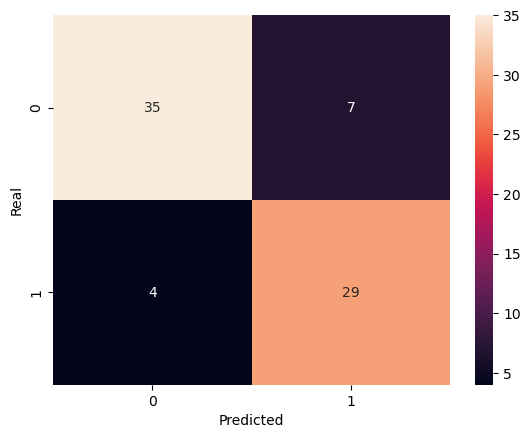

In [37]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

In [38]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print((acc, pre, rec, f1))

(0.8533333333333334, 0.8055555555555556, 0.8787878787878788, 0.8405797101449276)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
kmodel = KNeighborsClassifier(n_neighbors=11)
kmodel.fit(X_train, y_train)
print(kmodel.score(X_test, y_test))

0.8933333333333333


In [41]:
y_pred2 = kmodel.predict(X_test)

acc2 = accuracy_score(y_test, y_pred2)
pre2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)

print((acc, pre, rec, f1))
print((acc2, pre2, rec2, f12))

(0.8533333333333334, 0.8055555555555556, 0.8787878787878788, 0.8405797101449276)
(0.8933333333333333, 0.8571428571428571, 0.9090909090909091, 0.8823529411764706)
